In [ ]:
# Cell 1: Install MNE-Python
!pip install mne
!pip install pyEDFlib # MNE often uses pyEDFlib for EDF files, good to explicitly install
# No need to install tensorflow or scikit-learn for basic MNE EDA, they are generally pre-installed
# and only needed for the machine learning part later.

print("Libraries installed!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyEDFlib: filename=pyedflib-0.1.40-cp311-cp311-linux_x86_64.whl size=2746682 sha256=27d4a23fbbb3df37f77bb8d8960f3cf8618984311be9b3a622b672074b540d8b
  Stored in directory: /root/.cache/pip/wheels/8d/df/d6/88ce619bde055ebffebae5380645802eca490817853b60b45b
Successfully built pyEDFlib
Libraries installed!


In [ ]:
# Cell 2: Load the EEG data
import mne
import os # For checking if the file exists

# Define the filename
edf_file = "chb01_01.edf"

# Check if the file exists in the current directory (Colab's /content/ directory)
if os.path.exists(edf_file):
    print(f"Loading {edf_file}...")
    try:
        # Load the EDF file. preload=True reads all data into memory.
        # Set verbose='WARNING' to only show warnings, not all info messages.
        raw = mne.io.read_raw_edf(edf_file, preload=True, verbose='WARNING')
        print("File loaded successfully!")
    except ValueError as e:
        # Catch the specific ValueError indicating a problem with the file header
        print(f"Error loading file {edf_file}: {e}")
        print("This error often indicates that the EDF file is corrupted or has an invalid header structure.")
        raw = None # Set raw to None to avoid errors later
else:
    print(f"Error: {edf_file} not found. Please upload the file to Colab's session storage.")
    raw = None # Set raw to None to avoid errors later if file not found

Loading chb01_01.edf...


/tmp/ipython-input-7-750092598.py:14: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_file, preload=True, verbose='WARNING')
/tmp/ipython-input-7-750092598.py:14: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw = mne.io.read_raw_edf(edf_file, preload=True, verbose='WARNING')


File loaded successfully!


In [ ]:
# Cell 3: Basic Data Inspection
if raw is not None:
    print("\n--- Raw Data Information ---")
    print(raw)
    print("\n--- Channel Names ---")
    print("Total channels:", len(raw.ch_names))
    print("First 10 channel names:", raw.ch_names[:10])
    print("\n--- Sampling Frequency ---")
    print(f"Sampling frequency: {raw.info['sfreq']} Hz")
    print("\n--- Data Duration ---")
    print(f"Data duration: {raw.times[-1]:.2f} seconds")
    print("\n--- Channel Types ---")
    print(raw.info['chs'][0])
    print("Inferred channel types:", raw.get_channel_types())
else:
    print("Raw data not loaded. Please check previous steps.")


--- Raw Data Information ---
<RawEDF | chb01_01.edf, 23 x 68096 (266.0 s), ~12.0 MiB, data loaded>

--- Channel Names ---
Total channels: 23
First 10 channel names: ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4']

--- Sampling Frequency ---
Sampling frequency: 256.0 Hz

--- Data Duration ---
Data duration: 266.00 seconds

--- Channel Types ---
{'cal': 1.0, 'logno': 1, 'scanno': 1, 'range': 1.0, 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'FP1-F7', 'unit': 107 (FIFF_UNIT_V), 'coord_frame': 4 (FIFFV_COORD_HEAD), 'coil_type': 1 (FIFFV_COIL_EEG), 'kind': 2 (FIFFV_EEG_CH), 'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])}
Inferred channel types: ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg']


In [ ]:
# Cell 4: Preprocessing steps (Optional but good for cleaner plots)
import matplotlib.pyplot as plt # Ensure matplotlib is imported for plotting (though not directly used in this cell, good for general notebook)

if raw is not None:
    print("\n--- Preprocessing ---")

    # 1. Apply a High-pass Filter (remove slow drifts)
    # Common for EEG to remove very slow activity (e.g., skin potentials, movement artifacts)
    # 0.5 Hz is a common high-pass frequency
    raw.filter(l_freq=0.5, h_freq=None, verbose='WARNING')
    print("High-pass filter (0.5 Hz) applied.")

    # 2. Apply a Low-pass Filter (remove high-frequency noise like muscle artifacts, line noise)
    # A low-pass filter at ~45-70 Hz is common for EEG to remove high-frequency noise.
    # For 50 Hz line noise regions (common in India), use 45 Hz to avoid the noise.
    raw.filter(l_freq=None, h_freq=45, verbose='WARNING')
    print("Low-pass filter (45 Hz) applied.")

    # 3. Resampling (Optional: if you want to reduce data points for faster processing/plotting)
    # If your data's original sampling frequency (raw.info['sfreq']) is very high (e.g., 2000 Hz or more)
    # you might consider resampling to a more manageable rate like 256 Hz or 512 Hz.
    # Example:
    # if raw.info['sfreq'] > 512:
    #     new_sfreq = 256 # Or 512
    #     raw.resample(sfreq=new_sfreq)
    #     print(f"Data resampled to {new_sfreq} Hz")

    # 4. Drop unnecessary channels (if any, e.g., ECG, EOG if not needed for EEG analysis)
    # The CHB-MIT dataset mainly consists of EEG channels, so this might not be strictly needed.
    # But if you see non-EEG channels in raw.ch_names (from Cell 3 output) you want to remove:
    # Example: raw.drop_channels(['ECG', 'AECG']) # Replace with actual non-EEG channel names
    # print("Unnecessary channels dropped (if any).")

else:
    print("Raw data not loaded. Skipping preprocessing.")


--- Preprocessing ---
High-pass filter (0.5 Hz) applied.
Low-pass filter (45 Hz) applied.



--- Plotting Raw EEG Data ---
Using matplotlib as 2D backend.


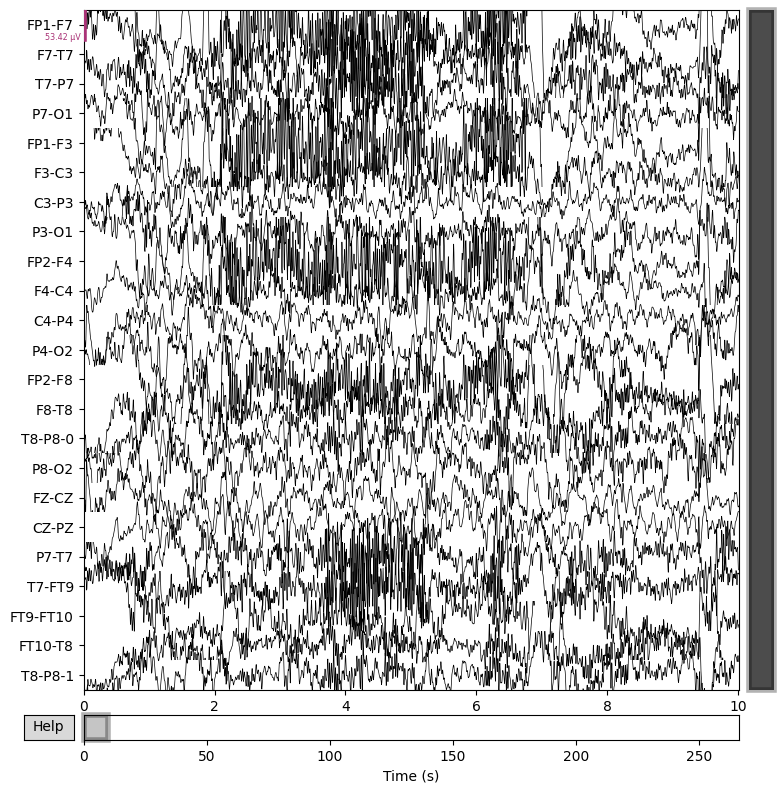

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


/tmp/ipython-input-11-1185236936.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


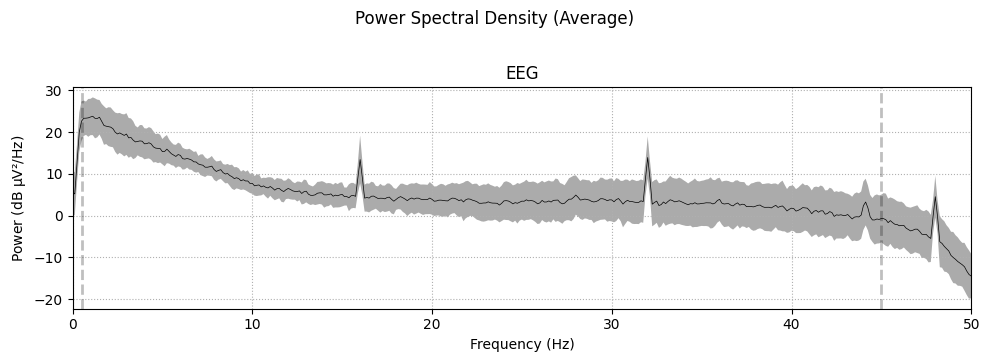

In [ ]:
# Cell 5: Plot Raw EEG Data
import matplotlib.pyplot as plt

if raw is not None:
    print("\n--- Plotting Raw EEG Data ---")
    # raw.plot() is highly interactive. In Colab, it often produces static plots.

    # Plot the full data (or a segment). You might need to adjust n_channels and duration.
    # n_channels: Number of channels to display. Use less if too cluttered.
    # duration: How many seconds to display at a time.
    # scalings: 'auto' or a dictionary like dict(eeg=20e-6) to manually set scaling (Volts per line).
    fig_raw = raw.plot(n_channels=23, duration=10, scalings='auto',
                       title="Raw EEG Data (First 10s of 23 Channels)", show=False)
    plt.show() # Display the plot

    # Plot power spectral density (PSD) to see frequency content before/after filtering
    # This helps identify line noise, common bands (alpha, beta, theta, delta)
    fig_psd = raw.plot_psd(average=True, fmax=50, show=False) # fmax to focus on relevant range
    fig_psd.suptitle('Power Spectral Density (Average)', y=1.02) # Add a title
    plt.tight_layout()
    plt.show()
else:
    print("Raw data not loaded. Skipping plotting.")


--- Setting Channel Types and Montage ---
Updated channel types: ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg']

--- Attempting to rename channels for standard montage matching ---
Proposed channel mapping:
  'FP1-F7' -> 'FP1'
  'F7-T7' -> 'F7'
  'T7-P7' -> 'T7'
  'P7-O1' -> 'P7'
  'FP1-F3' -> 'FP1_1'
  'F3-C3' -> 'F3'
  'C3-P3' -> 'C3'
  'P3-O1' -> 'P3'
  'FP2-F4' -> 'FP2'
  'F4-C4' -> 'F4'
  'C4-P4' -> 'C4'
  'P4-O2' -> 'P4'
  'FP2-F8' -> 'FP2_1'
  'F8-T8' -> 'F8'
  'T8-P8-0' -> 'T8'
  'P8-O2' -> 'P8'
  'FZ-CZ' -> 'FZ'
  'CZ-PZ' -> 'CZ'
  'P7-T7' -> 'P7_1'
  'T7-FT9' -> 'T7_1'
  'FT9-FT10' -> 'FT9-FT10'
  'FT10-T8' -> 'FT10-T8'
  'T8-P8-1' -> 'T8_1'
Channels renamed successfully.
New channel names (first 10): ['FP1', 'F7', 'T7', 'P7', 'FP1_1', 'F3', 'C3', 'P3', 'FP2', 'F4']
All new channel names are unique: True
Standard 10-20 montage set (or attempted).


/tmp/ipython-input-15-2585948938.py:72: RuntimeWarning: DigMontage is only a subset of info. There are 11 channel positions not present in the DigMontage. The channels missing from the montage are:

['FP1', 'FP1_1', 'FP2', 'FP2_1', 'FZ', 'CZ', 'P7_1', 'T7_1', 'FT9-FT10', 'FT10-T8', 'T8_1'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw.set_montage(standard_montage, on_missing='warn', verbose='WARNING') # 'warn' for feedback


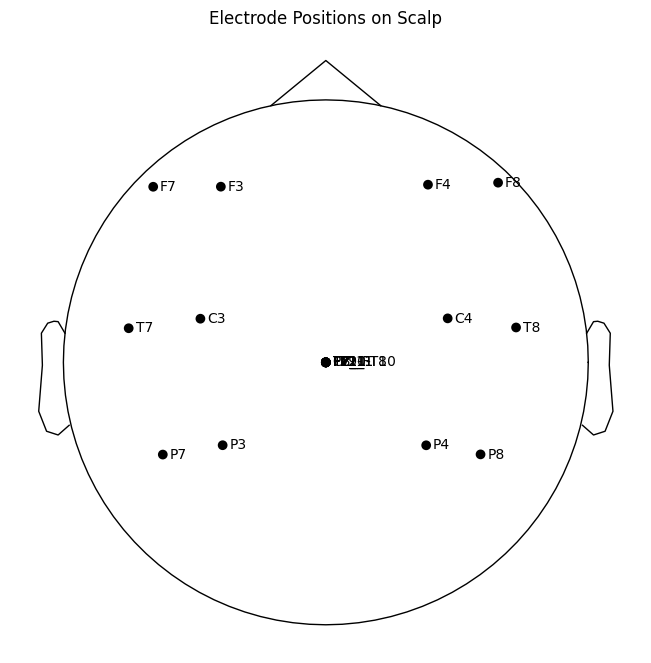

In [ ]:
# Cell 6: Set Channel Types and Montage (REVISED for Unique Channel Names)
import matplotlib.pyplot as plt # Ensure matplotlib is imported

if raw is not None:
    print("\n--- Setting Channel Types and Montage ---")

    # 1. Set channel types to 'eeg'
    # MNE automatically infers some types, but let's ensure they are 'eeg'.
    for ch_name in raw.ch_names:
        if any(keyword in ch_name for keyword in ['EEG', 'FP', 'F', 'T', 'C', 'P', 'O', 'FZ', 'CZ', 'PZ', 'A1', 'A2']): # Expanded keywords
            raw.set_channel_types({ch_name: 'eeg'}, verbose=False)

    print("Updated channel types:", raw.get_channel_types())

    # --- REVISED: Channel Renaming for Standard Montage Matching ---
    print("\n--- Attempting to rename channels for standard montage matching ---")
    original_ch_names = raw.ch_names.copy() # Keep a copy of original names
    new_channel_mapping = {}
    standard_electrode_names = ['FP1', 'FP2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'FZ', 'CZ', 'PZ', 'A1', 'A2'] # Common 10-20 names

    for i, ch_name in enumerate(original_ch_names):
        # Strip 'EEG ' prefix if present
        stripped_name = ch_name.replace('EEG ', '')

        # Try to extract a standard 10-20 name from bipolar or direct names
        # Example: 'FP1-F7' -> 'FP1'
        # Example: 'FP1' -> 'FP1'
        found_match = False
        for std_name in standard_electrode_names:
            if stripped_name.startswith(std_name) and (len(stripped_name) == len(std_name) or '-' in stripped_name):
                # If it's a direct match or starts with a match and is bipolar
                new_name = std_name
                # Ensure uniqueness if multiple bipolar channels start with the same electrode
                # We'll append a suffix if the new name is already in our mapping's values
                suffix_counter = 1
                temp_new_name = new_name
                while temp_new_name in new_channel_mapping.values():
                    temp_new_name = f"{new_name}_{suffix_counter}"
                    suffix_counter += 1
                new_channel_mapping[ch_name] = temp_new_name
                found_match = True
                break
        if not found_match:
            # If no standard match, try to use the name as is, ensuring uniqueness
            temp_new_name = ch_name # Default to original name
            suffix_counter = 1
            while temp_new_name in new_channel_mapping.values():
                temp_new_name = f"{ch_name}_{suffix_counter}"
                suffix_counter += 1
            new_channel_mapping[ch_name] = temp_new_name


    # Print the proposed mapping before applying
    print("Proposed channel mapping:")
    for old, new in new_channel_mapping.items():
        print(f"  '{old}' -> '{new}'")

    # Apply the renaming
    try:
        raw.rename_channels(new_channel_mapping)
        print("Channels renamed successfully.")
        print("New channel names (first 10):", raw.ch_names[:10])
        print("All new channel names are unique:", len(raw.ch_names) == len(set(raw.ch_names)))
    except Exception as e:
        print(f"Error during channel renaming: {e}")
        print("Channel renaming failed. This might affect montage application and topomaps.")


    # Set a standard montage (e.g., 10-20 system)
    try:
        standard_montage = mne.channels.make_standard_montage('standard_1020')
        raw.set_montage(standard_montage, on_missing='warn', verbose='WARNING') # 'warn' for feedback
        print("Standard 10-20 montage set (or attempted).")
    except Exception as e:
        print(f"Could not set standard 10-20 montage: {e}")
        print("This might still happen if renamed channels don't precisely match the 'standard_1020' montage.")
        print("Proceeding without full montage. Some topographical plots might not be available.")

    # Plot electrode positions (optional, this plot requires a montage to be set)
    if raw.get_montage() is not None:
        fig_montage = raw.plot_sensors(show_names=True, kind='topomap', show=False) # show_names=True to check mapping
        fig_montage.suptitle('Electrode Positions on Scalp', y=1.02)
        plt.show()
    else:
        print("Montage not set, skipping electrode position plot.")

else:
    print("Raw data not loaded. Skipping channel type and montage setting.")


--- Exploring Frequency Bands ---
Calculating PSD for Delta band (0.5-4 Hz)...
  Average power in Delta band: 2.10e-10 V^2/Hz


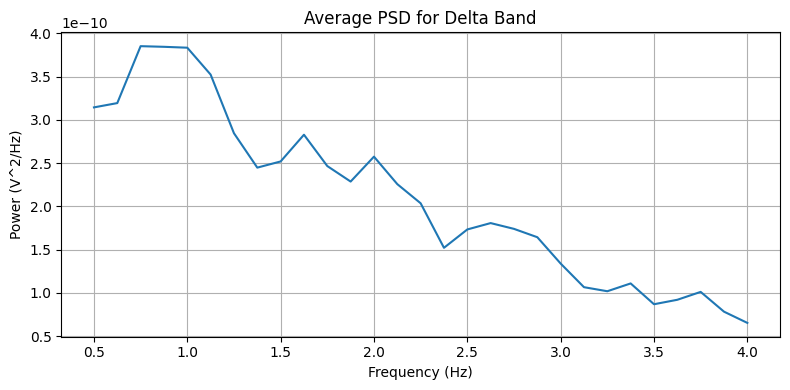

Calculating PSD for Theta band (4-8 Hz)...
  Average power in Theta band: 3.37e-11 V^2/Hz


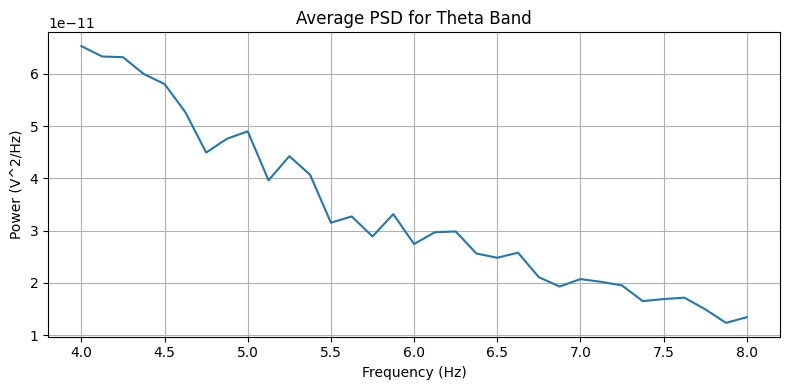

Calculating PSD for Alpha band (8-12 Hz)...
  Average power in Alpha band: 7.42e-12 V^2/Hz


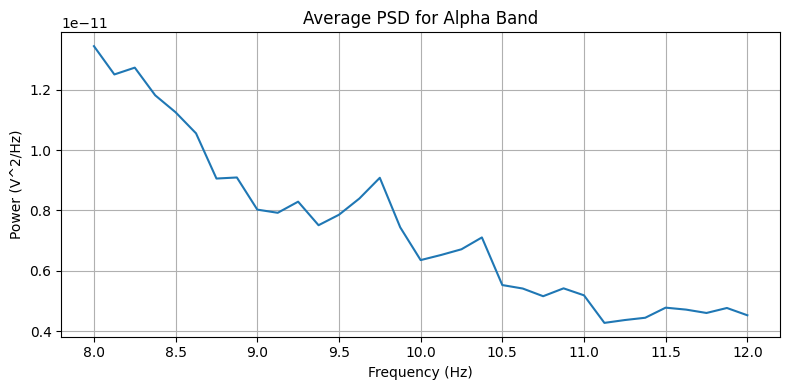

Calculating PSD for Beta band (13-30 Hz)...
  Average power in Beta band: 4.18e-12 V^2/Hz


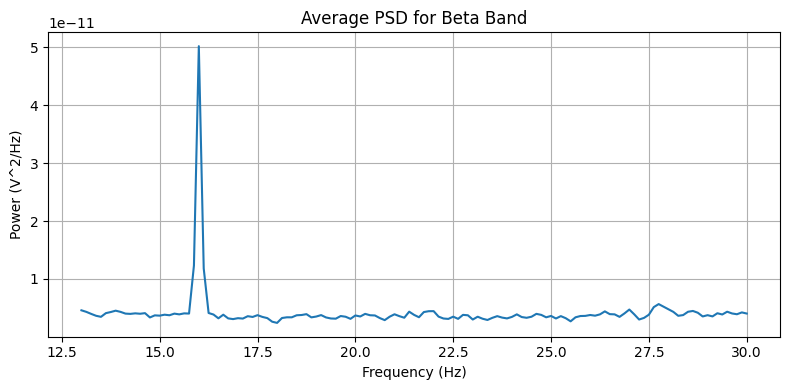

Calculating PSD for Gamma band (30-45 Hz)...
  Average power in Gamma band: 3.70e-12 V^2/Hz


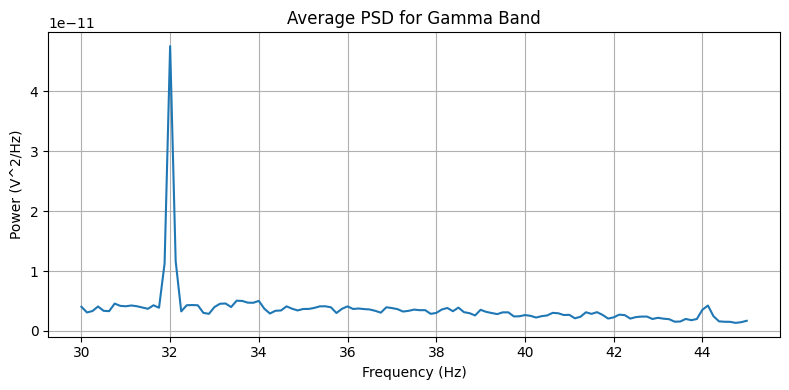


--- Plotting Power Topomaps for Bands ---
Plotting topomaps for these channels: ['F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4']
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Plotting topomap for Delta band (0.5-4 Hz)...


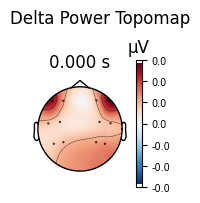

Plotting topomap for Theta band (4-8 Hz)...


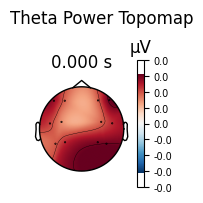

Plotting topomap for Alpha band (8-12 Hz)...


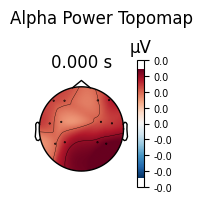

Plotting topomap for Beta band (13-30 Hz)...


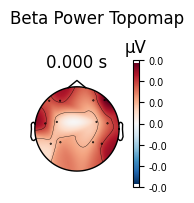

Plotting topomap for Gamma band (30-45 Hz)...


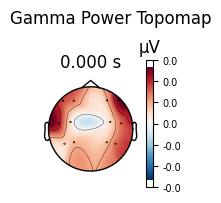

In [ ]:
# Cell 7: Explore Frequency Bands (Power Spectral Density - PSD) - FINAL FINAL FINAL FINAL REVISION: Exclude known problematic channels
import matplotlib.pyplot as plt
import numpy as np

if raw is not None:
    print("\n--- Exploring Frequency Bands ---")

    bands = {
        "Delta": [0.5, 4],
        "Theta": [4, 8],
        "Alpha": [8, 12],
        "Beta": [13, 30],
        "Gamma": [30, 45]
    }

    epochs = mne.make_fixed_length_epochs(raw, duration=10, preload=True, verbose=False)
    sfreq = epochs.info['sfreq']

    for band_name, (fmin, fmax) in bands.items():
        print(f"Calculating PSD for {band_name} band ({fmin}-{fmax} Hz)...")
        spectrum_band = epochs.compute_psd(method='welch', fmin=fmin, fmax=fmax, picks='eeg', verbose=False)
        psds_band, freqs_band = spectrum_band.get_data(return_freqs=True)

        mean_power = psds_band.mean(axis=(0, 1)).mean()
        print(f"  Average power in {band_name} band: {mean_power:.2e} V^2/Hz")

        fig_band_psd, ax = plt.subplots(figsize=(8, 4))
        ax.plot(freqs_band, psds_band.mean(axis=0).mean(axis=0))
        ax.set(title=f'Average PSD for {band_name} Band', xlabel='Frequency (Hz)', ylabel='Power (V^2/Hz)')
        ax.grid(True)
        plt.tight_layout()
        plt.show()

    if raw.get_montage() is not None:
        print("\n--- Plotting Power Topomaps for Bands ---")

        # --- REVISED: Exclude FP1, FP2, FZ, CZ from topomap_channels ---
        # These channels were explicitly listed as problematic for overlapping positions.
        # By removing them, we ensure that only unambiguously located electrodes are used for topomaps.
        strict_topomap_channels = [
            'F7', 'F8', 'T7', 'T8', 'P7', 'P8', # Temporal/Parietal regions
            'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2' # Frontal/Central/Parietal/Occipital regions
            # Removed: 'FP1', 'FP2', 'FZ', 'CZ', 'PZ' (PZ might also be problematic, removed it just in case)
            # You can add 'PZ' back if it doesn't cause an error.
        ]

        # Filter the list to only include channels actually present in the data
        present_topomap_channels = [ch for ch in strict_topomap_channels if ch in raw.ch_names]

        if not present_topomap_channels:
            print("No suitable standard 10-20 channels found for topomap plotting after renaming. Skipping topomaps.")
        else:
            print(f"Plotting topomaps for these channels: {present_topomap_channels}")

            epochs_for_topomap = epochs.copy().pick_channels(present_topomap_channels)

            if len(epochs_for_topomap.ch_names) == 0:
                print("No EEG channels left after filtering for topomaps. Skipping topomaps.")
            else:
                for band_name, (fmin, fmax) in bands.items():
                    print(f"Plotting topomap for {band_name} band ({fmin}-{fmax} Hz)...")

                    spectrum_for_tmap = epochs_for_topomap.compute_psd(method='welch', fmin=fmin, fmax=fmax, picks='eeg', verbose=False)
                    psds_data = spectrum_for_tmap.get_data()

                    band_power_tmap = psds_data.mean(axis=-1).mean(axis=0)
                    band_power_tmap = band_power_tmap[:, np.newaxis]

                    evoked_band_power = mne.EvokedArray(band_power_tmap, epochs_for_topomap.info, tmin=0)

                    fig_tmap = evoked_band_power.plot_topomap(times=0, ch_type='eeg', show_names=False,
                                                             res=128, sensors=True, colorbar=True, show=False)
                    fig_tmap.suptitle(f'{band_name} Power Topomap', y=1.02)
                    plt.show()
    else:
        print("Montage not set, skipping power topomap plots. (Montage depends on Cell 6 success)")

else:
    print("Raw data not loaded. Skipping frequency band analysis.")

In [ ]:
# Cell 8: Saving Processed Data (Optional) - FINAL REVISED for set_meas_date() method
if raw is not None:
    print("\n--- Saving Processed Data ---")
    output_fif_file = "chb01_01_processed_raw.fif" # MNE's recommended file format (.fif)

    # --- REVISED: Use raw.set_meas_date(None) instead of direct assignment ---
    if raw.info['meas_date'] is not None:
        print(f"Original meas_date: {raw.info['meas_date']}")
        try:
            raw.set_meas_date(None) # Use the dedicated method to set meas_date to None
            print("Successfully set raw.info['meas_date'] to None.")
        except Exception as date_error:
            print(f"Warning: Could not set meas_date to None using set_meas_date(): {date_error}")
            print("Proceeding, but saving might still fail if the underlying date issue persists.")
    # --- END OF REVISED ---

    try:
        raw.save(output_fif_file, overwrite=True, verbose='WARNING')
        print(f"Processed raw data saved to {output_fif_file}")
        print(f"You can download this file from the Colab Files tab (left sidebar) by right-clicking on '{output_fif_file}' and selecting 'Download'.")
        print("To load it later in a new session or notebook: raw_loaded = mne.io.read_raw_fif(output_fif_file, preload=True)")
    except Exception as e:
        print(f"Error saving file: {e}")
        print("Ensure enough disk space if you were saving to Google Drive, or if the file is extremely large.")
else:
    print("Raw data not loaded. Skipping data saving.")


--- Saving Processed Data ---
Original meas_date: 2076-11-06 11:42:54+00:00
Successfully set raw.info['meas_date'] to None.
Processed raw data saved to chb01_01_processed_raw.fif
You can download this file from the Colab Files tab (left sidebar) by right-clicking on 'chb01_01_processed_raw.fif' and selecting 'Download'.
To load it later in a new session or notebook: raw_loaded = mne.io.read_raw_fif(output_fif_file, preload=True)
